In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# Reading the file
df = pd.read_csv("bank.csv", delimiter=';')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [3]:
# Checking for missing data
missing_data = df.isnull().sum()
missing_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [5]:
df.shape

(4521, 17)

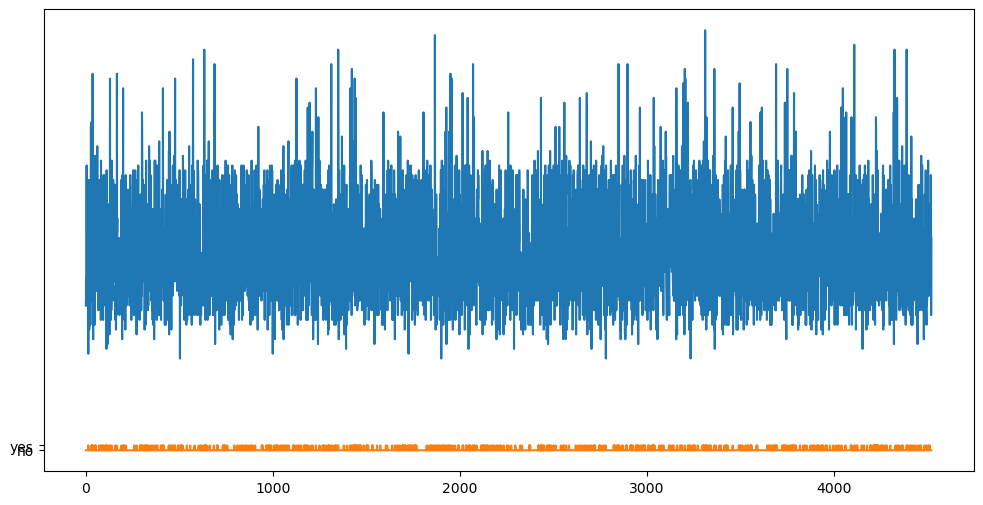

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(df.age)
plt.plot(df.y)

In [7]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
# df['y'] = pd.to_numeric(df['y'],errors='coerce')

In [10]:
df.campaign.unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

In [11]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df.groupby('y').nunique()

age  job  marital  education  default  balance  housing  loan  contact  \
y                                                                             
no    64   12        3          4        2     2149        2     2        3   
yes   63   12        3          4        2      455        2     2        3   

     day  month  duration  campaign  pdays  previous  poutcome  
y                                                               
no    31     12       741        32    262        23         4  
yes   31     12       408        14    109        13         4

In [14]:
# Dropping the irrelevant columns
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
#          'contact', 'day', 'month', 'duration', 
         'campaign', 'pdays', 'previous', 'poutcome', 'y']].copy()

In [15]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

      campaign  pdays  previous poutcome   y  
0            1     -1         0  unknown  no  
1            1    339         4  failure  no  
2            1    330         1  failure  no  
3            4     -1         0  unknown  no  
4            1     -1         0  unknown  no  
...        ...    ...       ...      ...  ..  
4516         5     -1         0  unknown  no  
4517         1     -1         0  unknown  no  
4518        11     -1         0  unknown  no  
4519         4    211         3    other  no  
4520         2    249         7    other  no  

[4521 rows x 13 columns]

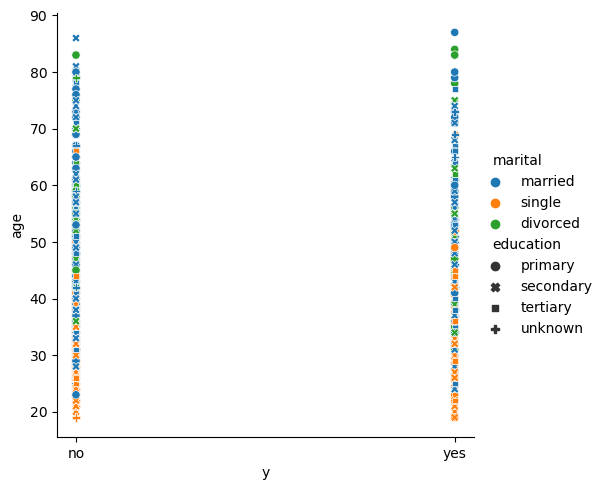

In [16]:
sns.relplot(
    data=df,
    x="y", y="age",
    hue="marital", style="education"
)

In [17]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

      campaign  pdays  previous poutcome   y  
0            1     -1         0  unknown  no  
1            1    339         4  failure  no  
2            1    330         1  failure  no  
3            4     -1         0  unknown  no  
4            1     -1         0  unknown  no  
...        ...    ...       ...      ...  ..  
4516         5     -1         0  unknown  no  
4517         1     -1         0  unknown  no  
4518        11     -1         0  unknown  no  
4519         4    211         3    other  no  
4520         2    249         7    other  no  

[4521 rows x 13 columns]

In [18]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
df.shape

(4521, 13)

In [20]:
# Resetting the index of the dataset and dropping the index column
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [21]:
df.shape

(4518, 13)

In [22]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4513   33       services  married  secondary      no     -333     yes   no   
4514   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4515   57     technician  married  secondary      no      295      no   no   
4516   28    blue-collar  married  secondary      no     1137      no   no   
4517   44   entrepreneur   single   tertiary      no     1136     yes  yes   

      campaign  pdays  previous poutcome   y  
0            1     -1         0  unknown  no  
1            1    339         4  failure  no  
2            1    330         1  failure  no  
3            4     -1         0  unknown  no  
4            1     -1         0  unknown  no  
...        ...    ...       ...      ...  ..  
4513         5     -1         0  unknown  no  
4514         1     -1         0  unknown  no  
4515        11     -1         0  unknown  no  
4516         4    211         3    other  no  
4517         2    249         7    other  no  

[4518 rows x 13 columns]

In [24]:
# Cheking the number of yes and no's
df['y'].value_counts()

no     3997
yes     521
Name: y, dtype: int64

In [25]:
# The median age of the customers churned out of bank
churned_age = df.query('y == "yes"')['age'].agg(['median'])
churned_age

median    40.0
Name: age, dtype: float64

In [26]:
# Median age of the customers who stay with the bank
not_churned_age = df.query('y == "no"')['age'].agg(['median'])
not_churned_age

median    39.0
Name: age, dtype: float64

In [27]:
# Number of unemployed people who left the bank
employment_churn = df.query('job == "unemployed" and y == "yes"')
employment_churn.shape

(13, 13)

In [28]:
# Number of employed people who left the bank
employment_churn = df.query('job != "unemployed" and y == "yes"')
employment_churn.shape

(508, 13)

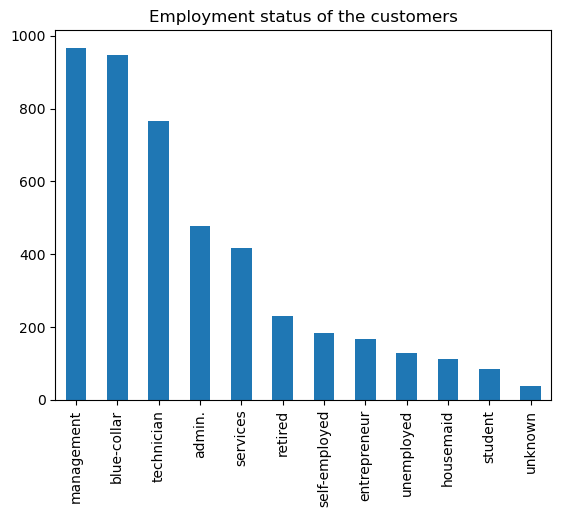

In [29]:
top_emplyed_churn = df['job'].value_counts()
ax = top_emplyed_churn.plot(kind='bar', title='Employment status of the customers')

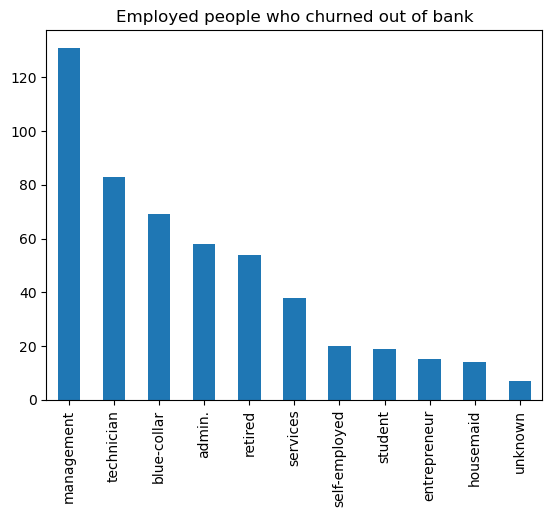

In [30]:
# People from which industry are leaving our bank?
employment_churn = df.query('job != "unemployed" and y == "yes"')
ax = employment_churn['job'].value_counts().plot(kind='bar', title='Employed people who churned out of bank')

<AxesSubplot:title={'center':'Age of people who churned'}, ylabel='Frequency'>

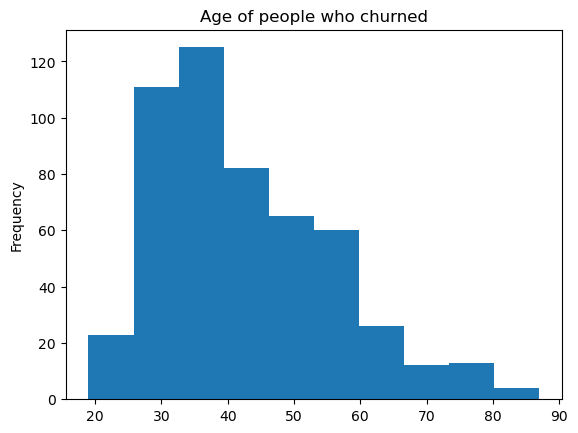

In [31]:
# Age group that leaves our bank
age_of_churn = df.query('y == "yes"')['age'].plot(kind='hist', title='Age of people who churned')
age_of_churn

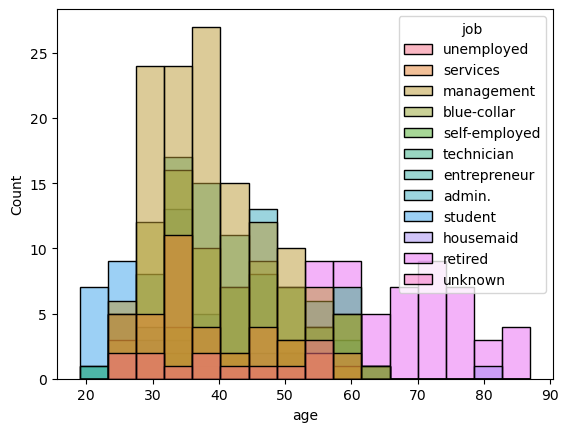

In [32]:
# Age group along with their job status and industry
sns.histplot(data=df, x=df.query('y == "yes"')['age'], hue='job')
plt.show()

In [33]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [35]:
x = df['education'].value_counts()
x

secondary    2305
tertiary     1348
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot:title={'center':'Education level of the customers'}>

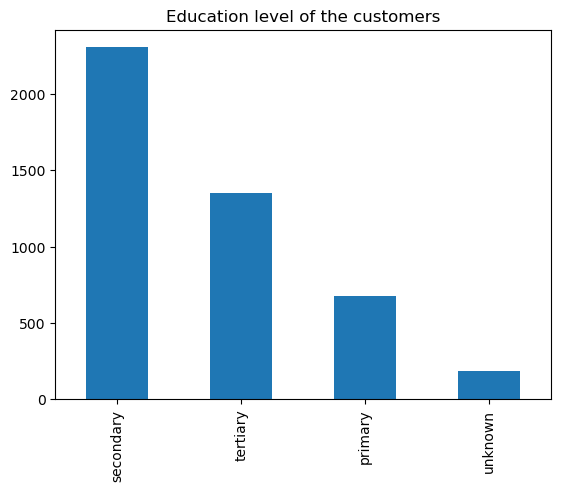

In [36]:
x.plot(kind='bar', title='Education level of the customers')

<AxesSubplot:title={'center':'Education level of the customers who left our service'}>

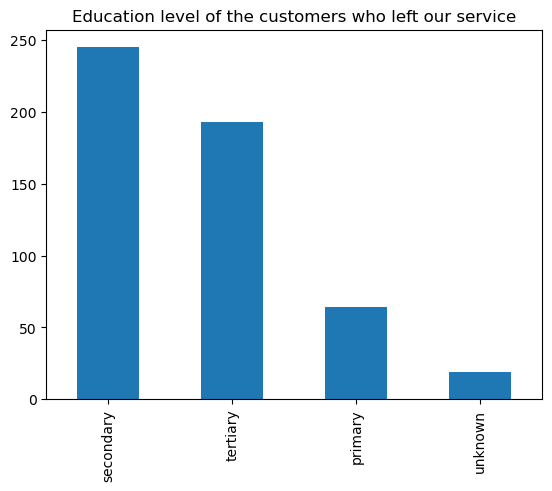

In [37]:
x = df.query('y == "yes"')['education'].value_counts()
x.plot(kind='bar', title='Education level of the customers who left our service')

In [38]:
defaulter_churn = df['default'].value_counts()
defaulter_churn

no     4442
yes      76
Name: default, dtype: int64

<AxesSubplot:title={'center':'Did the customers who defaulted on loans leave our service?'}>

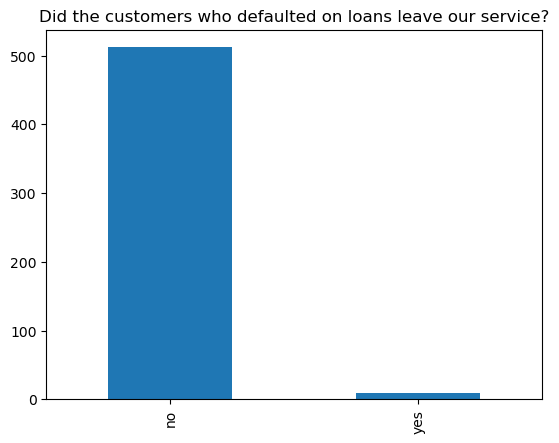

In [39]:
x = df.query('y == "yes"')['default'].value_counts()
x.plot(kind='bar', title='Did the customers who defaulted on loans leave our service?')

In [40]:
defaulter_churn = df['housing'].value_counts()
defaulter_churn

yes    2559
no     1959
Name: housing, dtype: int64

<AxesSubplot:title={'center':'Whether the churned customers owned any houses?'}>

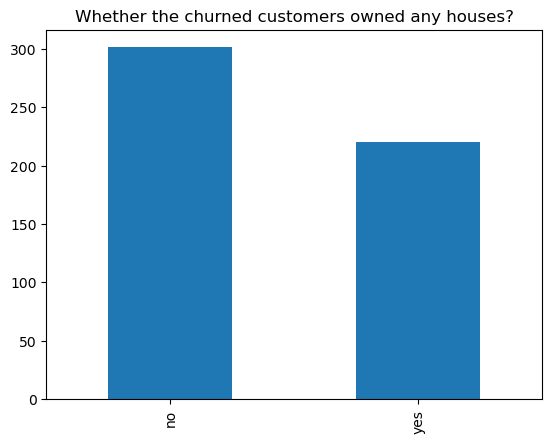

In [41]:
x = df.query('y == "yes"')['housing'].value_counts()
x.plot(kind='bar', title='Whether the churned customers owned any houses?')

In [42]:
defaulter_churn = df['loan'].value_counts()
defaulter_churn

no     3827
yes     691
Name: loan, dtype: int64

<AxesSubplot:title={'center':'Did the customer had any outstanding loan?'}>

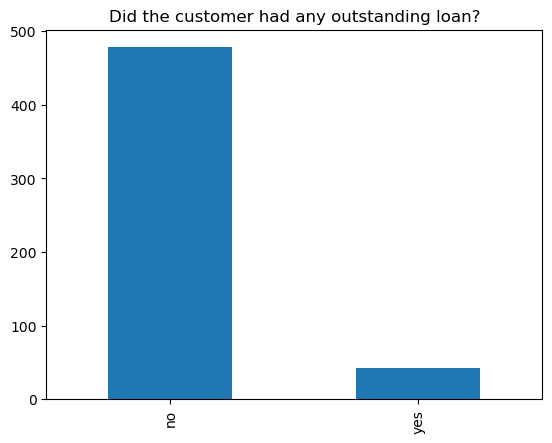

In [43]:
x = df.query('y == "yes"')['loan'].value_counts()
x.plot(kind='bar', title="Did the customer had any outstanding loan?")

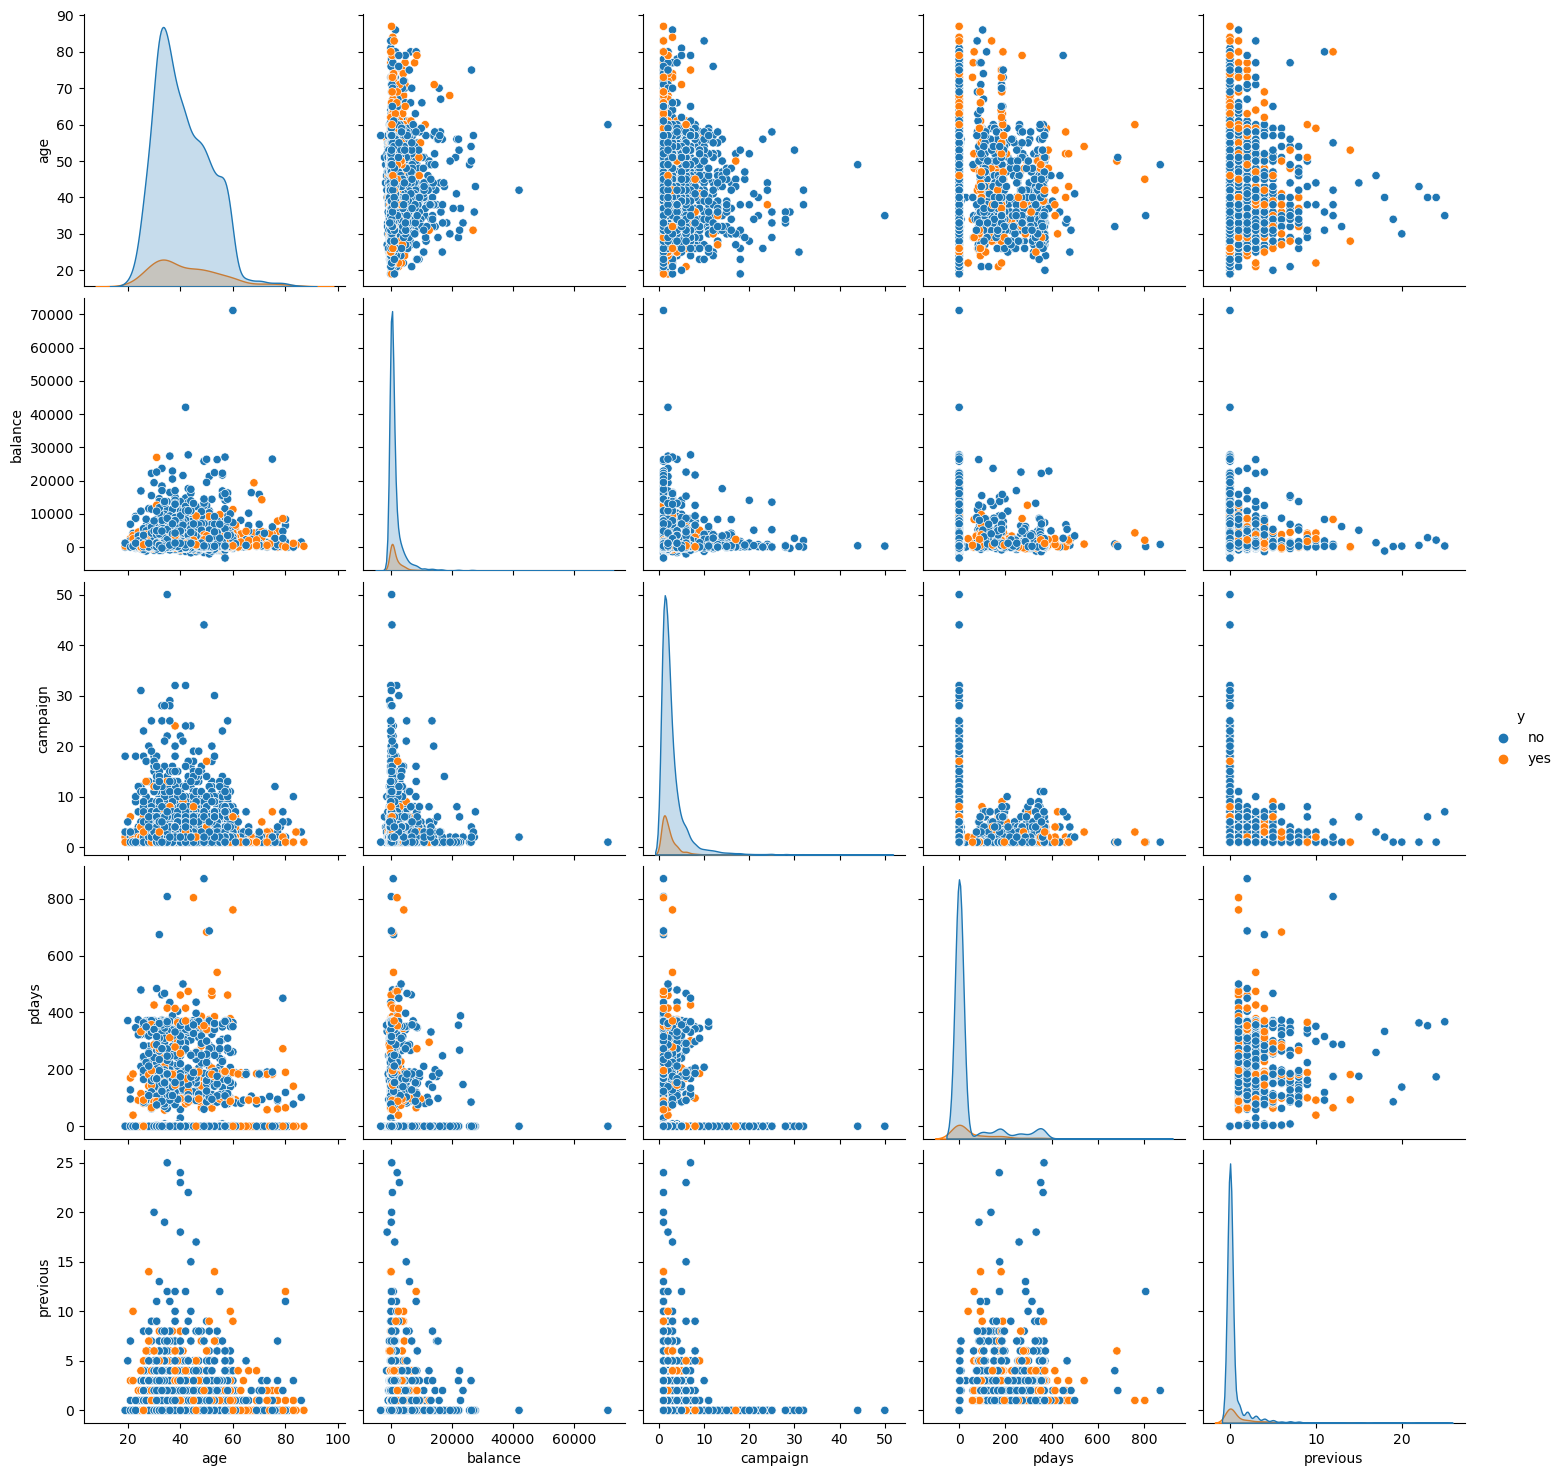

In [44]:
sns.pairplot(df, hue='y', height=3)
plt.show()

In [45]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4513   33       services  married  secondary      no     -333     yes   no   
4514   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4515   57     technician  married  secondary      no      295      no   no   
4516   28    blue-collar  married  secondary      no     1137      no   no   
4517   44   entrepreneur   single   tertiary      no     1136     yes  yes   

      campaign  pdays  previous poutcome   y  
0            1     -1         0  unknown  no  
1            1    339         4  failure  no  
2            1    330         1  failure  no  
3            4     -1         0  unknown  no  
4            1     -1         0  unknown  no  
...        ...    ...       ...      ...  ..  
4513         5     -1         0  unknown  no  
4514         1     -1         0  unknown  no  
4515        11     -1         0  unknown  no  
4516         4    211         3    other  no  
4517         2    249         7    other  no  

[4518 rows x 13 columns]

In [46]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [49]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

job  marital  education default housing loan poutcome   y
0   unemployed  married    primary      no      no   no  unknown  no
1     services  married  secondary      no     yes  yes  failure  no
2   management   single   tertiary      no     yes   no  failure  no
3   management  married   tertiary      no     yes  yes  unknown  no
4  blue-collar  married  secondary      no     yes   no  unknown  no

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [62]:
# Label Encode all labels
dataset_con_enc = df.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

age  job  marital  education  default  balance  housing  loan  campaign  \
0   11   10        1          0        0     1475        0     0         0   
1   14    7        1          1        0     2030        1     1         0   
2   16    4        2          2        0     1303        1     0         0   
3   11    4        1          2        0     1352        1     1         3   
4   40    1        1          1        0      274        1     0         0   

   pdays  previous  poutcome  y  
0      0         0         3  0  
1    228         4         0  0  
2    219         1         0  0  
3      0         0         3  0  
4      0         0         3  0

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [64]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [67]:
df.job

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4513         services
4514    self-employed
4515       technician
4516      blue-collar
4517     entrepreneur
Name: job, Length: 4518, dtype: object

In [70]:
df1 = df.apply(LabelEncoder().fit_transform)
df1

age  job  marital  education  default  balance  housing  loan  campaign  \
0      11   10        1          0        0     1475        0     0         0   
1      14    7        1          1        0     2030        1     1         0   
2      16    4        2          2        0     1303        1     0         0   
3      11    4        1          2        0     1352        1     1         3   
4      40    1        1          1        0      274        1     0         0   
...   ...  ...      ...        ...      ...      ...      ...   ...       ...   
4513   14    7        1          1        0      119        1     0         4   
4514   38    6        1          2        1        0        1     1         0   
4515   38    9        1          1        0      558        0     0        10   
4516    9    1        1          1        0     1187        0     0         3   
4517   25    2        2          2        0     1186        1     1         1   

      pdays  previous  poutcome  y  
0         0         0         3  0  
1       228         4         0  0  
2       219         1         0  0  
3         0         0         3  0  
4         0         0         3  0  
...     ...       ...       ... ..  
4513      0         0         3  0  
4514      0         0         3  0  
4515      0         0         3  0  
4516    140         3         1  0  
4517    161         7         1  0  

[4518 rows x 13 columns]

In [72]:
X = df1[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = df1[['y']].copy()
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(n_neighbors=7)

In [74]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(n_neighbors=8)

In [75]:
y_pred = classifier.predict(X_test)

F:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[798   0]
 [106   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       798
           1       0.00      0.00      0.00       106

    accuracy                           0.88       904
   macro avg       0.44      0.50      0.47       904
weighted avg       0.78      0.88      0.83       904

Accuracy: 0.8827433628318584


F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# The above model achieved an accuracy of 88%